In [11]:
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils import contours
from imutils.perspective import four_point_transform

In [12]:
img = cv2.imread("Input/sudoku1.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

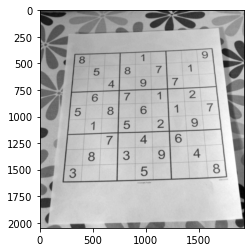

In [13]:
blurred_img = cv2.GaussianBlur(gray_img , (7,7), 3)
plt.imshow(blurred_img , cmap = "gray")

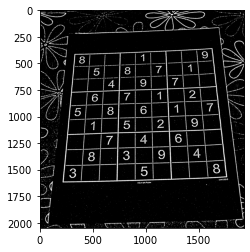

In [14]:
thresh = cv2.adaptiveThreshold(blurred_img , 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV , 11 ,2)
plt.imshow(thresh , cmap = "gray")

In [15]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0]

In [16]:
contours = imutils.grab_contours(contours)
contours = sorted(contours , key = cv2.contourArea , reverse = True)

In [17]:
sudoku_contour = None

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour , True)
    approx = cv2.approxPolyDP(contour , epsilon , True)
                              
    if len(approx) == 4:
        sudoku_contour = approx
        break

if sudoku_contour is None :
    print("Not found")

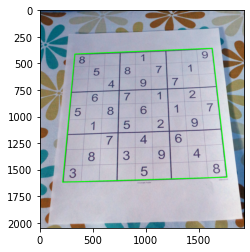

In [18]:
result = cv2.drawContours(img , [sudoku_contour] , -1 ,(0,255,0) , 8)
plt.imshow(result , cmap = "gray")

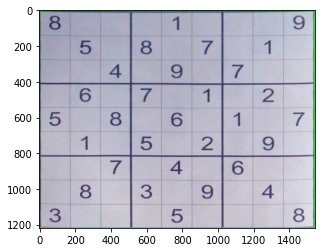

In [20]:
puzzle = four_point_transform(img, sudoku_contour.reshape(4,2))
warped = four_point_transform(gray_img, sudoku_contour.reshape(4,2))
plt.imshow(puzzle, cmap = "gray")